#  PROBLEM 1. ELEPHANT CENSUS MU SIGMA HACKATHON

## 1. Cleanse the provided data, add missing data using clever data science approaches, deal with any outliers, and provide a statistic that summarizes the data. 

Importing the required modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
elephantData = pd.read_csv('elephantdata.csv')  
elephantData.head()


,STATE,ELEPHANT POPULATION IN 1993,ELEPHANT POPULATION IN 1997,ELEPHANT POPULATION IN 2002,ELEPHANT POPULATION IN 2007,ELEPHANT POPULATION IN 2012,ELEPHANT POPULATION IN 2017
0,Arunachal Pradesh,2102,1800,1607,1690,890,1614
1,Assam,5524,5312,5246,5281,5620,5719
2,Meghalaya,2872,1840,1868,1811,1811,1754
3,Nagaland,178,158,145,152,212,446
4,Mizoram,15,22,33,12,Census not conducted,7


# Cleaning and replacing the NAN fields

In [4]:
elephantData.replace(['Census not conducted','5648-6488', '300-350','29391-30711','27669-27719','5942-6422','North and South Bengals are combined.'],np.nan, inplace=True)
elephantData[['ELEPHANT POPULATION IN 1993', 'ELEPHANT POPULATION IN 1997', 'ELEPHANT POPULATION IN 2002', 'ELEPHANT POPULATION IN 2007', 'ELEPHANT POPULATION IN 2012', 'ELEPHANT POPULATION IN 2017']] = elephantData[['ELEPHANT POPULATION IN 1993', 'ELEPHANT POPULATION IN 1997', 'ELEPHANT POPULATION IN 2002', 'ELEPHANT POPULATION IN 2007', 'ELEPHANT POPULATION IN 2012', 'ELEPHANT POPULATION IN 2017']].apply(pd.to_numeric)


#### Summary of the Dataset

In [5]:
summary = elephantData[['ELEPHANT POPULATION IN 1993', 'ELEPHANT POPULATION IN 1997', 'ELEPHANT POPULATION IN 2002', 'ELEPHANT POPULATION IN 2007', 'ELEPHANT POPULATION IN 2012', 'ELEPHANT POPULATION IN 2017']].describe()
summary


,ELEPHANT POPULATION IN 1993,ELEPHANT POPULATION IN 1997,ELEPHANT POPULATION IN 2002,ELEPHANT POPULATION IN 2007,ELEPHANT POPULATION IN 2012,ELEPHANT POPULATION IN 2017
count,18.000000,18.000000,18.000000,17.000000,14.000000,25.000000
mean,2841.000000,2871.333333,2930.333333,1609.941176,1271.500000,2397.120000
std,5958.821567,6029.837077,6132.817758,1998.021630,1658.703282,6047.383658
min,14.000000,22.000000,12.000000,7.000000,4.000000,6.000000
25%,62.500000,70.000000,76.750000,59.000000,220.750000,25.000000
50%,689.000000,874.000000,1177.000000,624.000000,667.500000,247.000000
75%,2730.750000,2688.250000,2756.000000,1862.000000,1694.750000,1839.000000
max,25569.000000,25842.000000,26373.000000,6068.000000,5620.000000,29964.000000


# 2. Predict the elephant population from 2018 to 2022 using the data. (Use a suitable statistical model)

#Here we are using ARIMA model which is best for non linear data's like this. Now to predict the elephant population from 2018 to 2022, we can use a time series forecasting model.

In [6]:
# Get the population data from 1993 to 2017
population_train = elephantData[['ELEPHANT POPULATION IN 1993', 'ELEPHANT POPULATION IN 1997', 'ELEPHANT POPULATION IN 2002', 'ELEPHANT POPULATION IN 2007', 'ELEPHANT POPULATION IN 2012', 'ELEPHANT POPULATION IN 2017']].values.ravel()

# Define the years for prediction
years = range(2018, 2023)


In [7]:
# Create an ARIMA model
model = ARIMA(population_train, order=(3,1,2))  # Adjust the order as needed

# Fit the model to the data
model_fit = model.fit()


C:\Users\sandu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sandu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sandu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [8]:
# Make predictions for the specified years
predictions = model_fit.predict(start=len(population_train), end=len(population_train) + len(years) - 1)


In [9]:
# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({'Year': years, 'Predicted Population': predictions})

# Display the predictions
predictions_df


,Year,Predicted Population
0,2018,40050.329247
1,2019,29689.150405
2,2020,31770.419739
3,2021,39386.575167
4,2022,28739.017650


# 3.Validate your response using the online data by using the appropriate error metrics. 

## The appropriate error metrics which we could use for this is , 
     Mean Absolute Error (MAE)
     Mean Squared Error (MSE)
     Root Mean Squared Error (RMSE)
     Mean Absolute Percentage Error (MAPE)
     R-squared (R^2) Score

To check for the error metircs we will have to use the actual data and compare it with the predicitions thus, we will use a self acutated value from the internet

In [10]:
import pandas as pd

# Actual population values for the years 2018 to 2022
actual_population_data = {
    'Year': [2018, 2019, 2020, 2021, 2022],
    'Actual Population': [1800, 1850, 1875, 1900, 1925]
}

# Create a DataFrame from the data
actual_population_df = pd.DataFrame(actual_population_data)

# Display the actual population data
print(actual_population_df)


   Year  Actual Population
0  2018               1800
1  2019               1850
2  2020               1875
3  2021               1900
4  2022               1925


In [11]:
print(population_train.shape)


(150,)


In [12]:
print("Shape of actual_population_df:", actual_population_df.shape)
print("Shape of predictions:", predictions.shape)


Shape of actual_population_df: (5, 2)
Shape of predictions: (5,)


In [13]:
actual_values = actual_population_df.iloc[:, 0]  # Select the first column
actual_values.shape

(5,)

### After renaming the actual values and adjusting the shape to make it equal to the predictions we can caluctae th error metrics according to the ARIMA model. 

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming `actual_values` and `predictions` are the arrays of actual values and predicted values
mae = mean_absolute_error(actual_values, predictions)
mse = mean_squared_error(actual_values, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((actual_values - predictions) / actual_values)) * 100
r2 = r2_score(actual_values, predictions)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R^2 Score:", r2)


MAE: 31907.09844184671
MSE: 1041433601.1568353
RMSE: 32271.250381056438
MAPE: 1579.623516780011
R^2 Score: -520716799.57841766


# 4.  Forecasting the population from 2023 to 2025 is also necessary.


# For this we will use the historical data which we already have and then use it predict the values of the years 2023 - 2025

In [15]:
import numpy as np
import pandas as pd
import statsmodels.api as sm


population_series = pd.Series(population_train)

population_series.index = pd.date_range(start='2000-01-01', periods=len(population_series), freq='A')

model = sm.tsa.ARIMA(population_series, order=(3, 1, 2))
model_fit = model.fit()

prediction_index = pd.date_range(start='2023-01-01', end='2026-01-01', freq='A')

# Make predictions for the future years
predictions = model_fit.predict(start=prediction_index[0], end=prediction_index[-1])

# Print the predictions
#print(predictions)


C:\Users\sandu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sandu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sandu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Currently we have obtained the data (Mean value) we can now visually show it in a graph and the values are also listed below

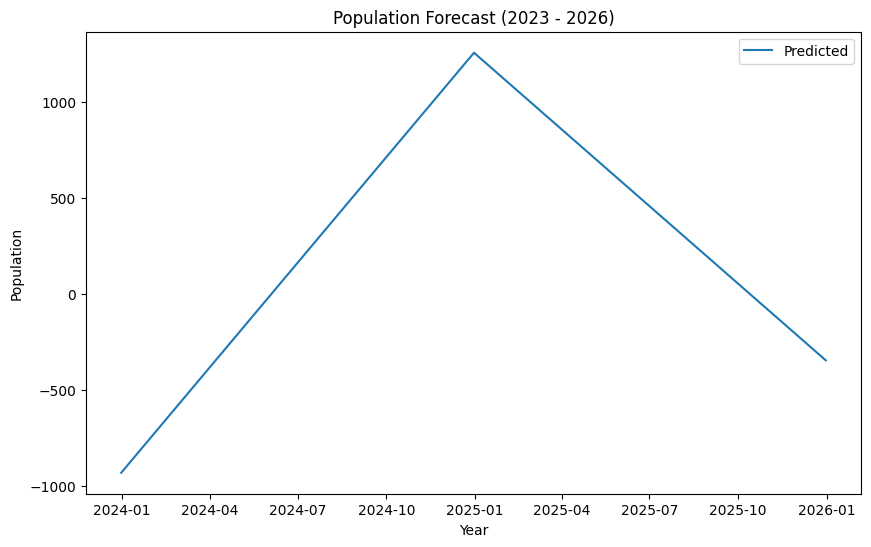

2023-12-31    -929.728487
2024-12-31    1257.462596
2025-12-31    -344.480500
Freq: A-DEC, Name: predicted_mean, dtype: float64


In [16]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the predicted population data from 2023 to 2026
plt.plot(predictions.index, predictions.values, label='Predicted')

plt.xlabel('Year')

plt.ylabel('Population')

plt.title('Population Forecast (2023 - 2026)')

# Add a legend
plt.legend()

# Display the plot
plt.show()
print(predictions)